In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import math

In [2]:
sns.set_style("whitegrid")
sns.set_palette(sns.color_palette(["#00A321","#5C3993", "#E28413", '#A31621', "#009FFD", '#F551A8', '#0F9E7A']))

In [3]:
exp_name = 'exp17G'
results_dir = '/home/emma/Documents/BC_Sim/results/' + exp_name + '/'

#import each set of results
MRpriv_df = pd.read_csv(results_dir + 'MRpriv.csv', index_col=0)
MRunpriv_df = pd.read_csv(results_dir + 'MRunpriv.csv', index_col=0)

dMR_df = pd.read_csv(results_dir + 'dMR.csv', index_col=0)
MR_ratio_df = pd.read_csv(results_dir + 'MR_ratio.csv', index_col=0)

In [4]:
MRpriv_df

,0.0,0.05,0.1,0.15,0.2,0.25,0.3,n_sim
0.00,37.504532,38.065796,38.934113,38.482011,39.448210,38.923483,39.386409,176092387
0.05,42.492914,43.539887,43.122496,42.930412,43.311009,43.681219,44.592027,176092387
0.10,48.249154,48.027909,48.615366,48.979759,48.395918,49.059163,49.193287,176092387
0.15,52.640292,52.774028,54.305567,54.185442,53.825216,52.746117,53.490260,176092387
0.20,57.660066,58.386880,59.618012,59.245061,59.710496,58.995081,59.896690,176092387
...,...,...,...,...,...,...,...,...
0.10,47.296982,48.446239,48.537358,47.573851,48.871549,47.533004,48.394848,683688611
0.15,53.044609,53.401008,54.554456,53.277557,53.770137,53.948187,53.566854,683688611
0.20,59.001392,57.689381,58.769250,59.808047,59.244191,59.967618,59.623564,683688611
0.25,64.390173,63.955820,63.123609,64.068575,65.009019,65.394458,66.329978,683688611


In [5]:
MRunpriv_df

,0.0,0.05,0.1,0.15,0.2,0.25,0.3,n_sim
0.00,132.228845,133.471991,133.851285,134.190415,132.854444,136.088382,135.529152,176092387
0.05,135.764591,136.814966,138.061729,138.466507,138.348377,136.980672,135.960951,176092387
0.10,141.018038,141.830636,140.043496,139.355364,141.328426,141.259899,143.225950,176092387
0.15,143.466659,145.708549,143.782114,146.099340,145.781204,145.034471,144.556462,176092387
0.20,147.809919,146.971670,147.701115,146.703383,147.551108,146.718497,149.981809,176092387
...,...,...,...,...,...,...,...,...
0.10,141.328071,140.549412,141.689333,140.476749,140.641172,141.008901,142.803468,683688611
0.15,141.673999,142.950362,144.787648,144.400254,146.871435,146.329212,146.835588,683688611
0.20,148.408105,147.310335,147.399511,147.314947,148.772172,146.279519,149.788762,683688611
0.25,150.880632,151.131835,151.061008,152.225118,152.253578,152.406991,151.587455,683688611


In [6]:
from scipy import stats
def simulation_confidence_intervals(df, simulation_column='n_sim', confidence=0.95):
    """
    Calculate mean and 95% confidence intervals for each entry across simulations.
    
    Parameters:
    df (pandas.DataFrame): DataFrame with simulation data
    simulation_column (str): Name of column identifying simulation number
    confidence (float): Confidence level (default 0.95)

The cbar parameter controls whether a colorbar should be added, and the cbar_ax parameter can optionally specify the axes where the colorbar should go. So, you could do:

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.DataFrame(np.random.random((10,10,)))

fig, axn = plt.subplots(2, 2, sharex=True, sharey=True)
cbar_ax = fig.add_axes([.91, .3, .03, .4])

for i, ax in enumerate(axn.flat):
    sns.heatmap(df, ax=ax,
                cbar=i == 0,
                vmin=0, vmax=1,
                cbar_ax=None if i else cbar_ax)
    
    Returns:
    tuple: (mean_df, lower_ci_df, upper_ci_df)
    """
    # Remove simulation column and group by index
    non_sim_columns = [col for col in df.columns if col != simulation_column]
    
    # Calculate mean
    mean_df = df[non_sim_columns].groupby(level=0).mean()
    
    # Calculate confidence intervals
    def calculate_ci(group):
        # Compute standard error and t-value
        sem = group.sem()
        n = len(group)
        t_value = stats.t.ppf((1 + confidence) / 2, df=n-1)
        return t_value * sem
    
    # Compute confidence intervals
    ci_values = df[non_sim_columns].groupby(level=0).apply(calculate_ci)
    
    # Create lower and upper bound DataFrames
    lower_ci_df = mean_df - ci_values
    upper_ci_df = mean_df + ci_values

    return mean_df, lower_ci_df, upper_ci_df

In [7]:
#get average and CIs over simulations
mean_MRpriv_df, lower_ci_MRpriv_df, upper_ci_MRpriv_df = simulation_confidence_intervals(MRpriv_df)
mean_MRunpriv_df, lower_ci_MRunpriv_df, upper_ci_MRunpriv_df = simulation_confidence_intervals(MRunpriv_df)
mean_dMR_df, lower_ci_dMR_df, upper_ci_dMR_df = simulation_confidence_intervals(dMR_df)
mean_MR_ratio_df, lower_ci_MR_ratio_df, upper_ci_MR_ratio_df = simulation_confidence_intervals(MR_ratio_df)

In [8]:
mean_MRpriv_df

,0.0,0.05,0.1,0.15,0.2,0.25,0.3
0.00,37.965111,38.163354,38.433665,38.673797,38.879230,39.177126,39.290431
0.05,42.718524,43.022953,43.244711,43.384960,43.681508,43.921215,44.116753
0.10,47.795975,47.969212,48.167447,48.486505,48.737631,48.906922,49.138575
0.15,53.053957,53.306647,53.485484,53.641662,53.931714,54.258266,54.237503
0.20,58.396132,58.588109,58.882163,59.115358,59.299566,59.592011,59.798963
0.25,63.984617,64.330677,64.392498,64.734027,65.025468,65.151075,65.434888
0.30,69.808212,70.099157,70.270841,70.503725,70.810090,70.865467,71.239718


In [9]:
mean_MRpriv_norm_df = (mean_MRpriv_df-mean_MRpriv_df.min().min())/(mean_MRpriv_df.max().max()-mean_MRpriv_df.min().min())
mean_MRunpriv_norm_df = (mean_MRunpriv_df-mean_MRunpriv_df.min().min())/(mean_MRunpriv_df.max().max()-mean_MRunpriv_df.min().min())

In [10]:
#relabel axes to correspond to actual TPR and FPR
mean_MRpriv_df = pd.DataFrame(data=mean_MRpriv_df.to_numpy(), columns=[0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45], index=[0.77, 0.72, 0.67, 0.62, 0.57, 0.52, 0.47])
mean_MRunpriv_df = pd.DataFrame(data=mean_MRunpriv_df.to_numpy(), columns=[0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45], index=[0.77, 0.72, 0.67, 0.62, 0.57, 0.52, 0.47])

In [11]:
mean_MRpriv_df

,0.15,0.20,0.25,0.30,0.35,0.40,0.45
0.77,37.965111,38.163354,38.433665,38.673797,38.879230,39.177126,39.290431
0.72,42.718524,43.022953,43.244711,43.384960,43.681508,43.921215,44.116753
0.67,47.795975,47.969212,48.167447,48.486505,48.737631,48.906922,49.138575
0.62,53.053957,53.306647,53.485484,53.641662,53.931714,54.258266,54.237503
0.57,58.396132,58.588109,58.882163,59.115358,59.299566,59.592011,59.798963
0.52,63.984617,64.330677,64.392498,64.734027,65.025468,65.151075,65.434888
0.47,69.808212,70.099157,70.270841,70.503725,70.810090,70.865467,71.239718


In [12]:
def plt_MR_heatmap(df, label, save=False):
    # sns.heatmap(df.iloc[::-1].astype(float), annot=True, fmt ='.1f', cmap='Reds')
    sns.heatmap(df.astype(float), annot=True, fmt ='.1f', cmap='Reds')
    plt.ylabel(u'AI System TPR')
    plt.xlabel(u'AI System FPR')
    plt.title(f'Average {label} Group Mortality Rate (per 100k)')
    if save:
        plt.savefig(results_dir + 'MR_' + label + '.png', dpi=800)
        plt.savefig(results_dir + 'MR_' + label + '.svg')
    plt.show()

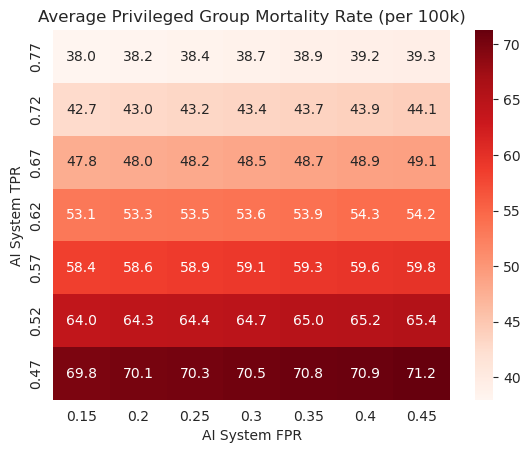

In [13]:
plt_MR_heatmap(mean_MRpriv_df, 'Privileged', save=True)

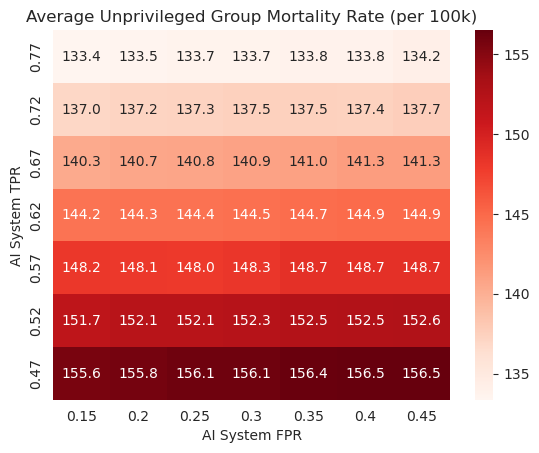

In [14]:
plt_MR_heatmap(mean_MRunpriv_df, 'Unprivileged', save=True)

In [15]:
def plt_dMR_heatmap(df, save=False):
    sns.heatmap(df.iloc[::-1].astype(float), annot=True, fmt ='.1f', cmap='Reds')
    plt.ylabel(u'AI System TPR')
    plt.xlabel(u'AI System FPR')
    plt.title('Average Mortality Rate Disparity (per 100k)')
    if save:
        plt.savefig(results_dir + 'deltaMR.png', dpi=800)
        plt.savefig(results_dir + 'deltaMR.svg')
    plt.show()

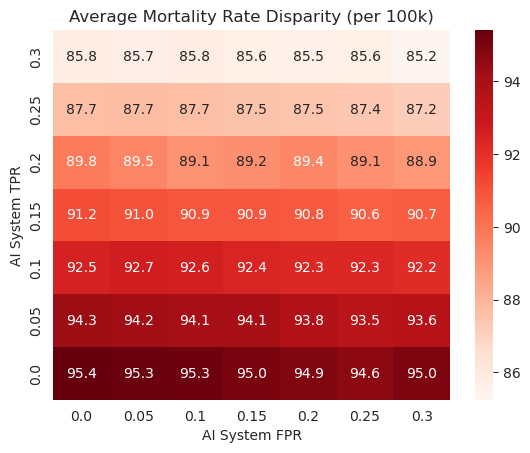

In [16]:
plt_dMR_heatmap(mean_dMR_df, save=True)

In [17]:
def plt_MR_ratio_heatmap(df, save=False):
    sns.heatmap(df.iloc[::-1].astype(float), annot=True, fmt ='.2f', cmap='Reds')
    plt.ylabel(u'AI System TPR')
    plt.xlabel(u'AI System FPR')
    plt.title('Average Mortality Rate Ratio (Unprivileged/Privileged)')
    if save:
        plt.savefig(results_dir + 'MR_ratio.png', dpi=800)
        plt.savefig(results_dir + 'MR_ratio.svg')
    plt.show()

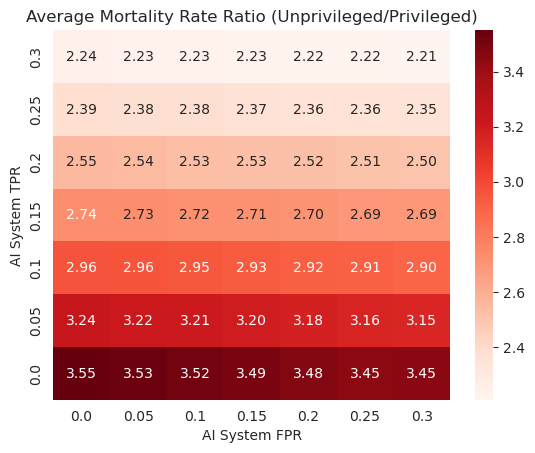

In [18]:
plt_MR_ratio_heatmap(mean_MR_ratio_df, save=True)